# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and a `DataFrame`, with four columns, `sales`, `site_visits`, `total_customers`, and `production_cost`

In [84]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

sales = np.linspace(100, 800, 100)

a = 100
b = 0.5
gamma = 50

# We have a simple linear relationship between site visits and sales
site_visits = a + b*sales + np.random.randn(sales.shape[0])*gamma

# We have a slightly more complicated relationship
# between sales and total customers. Our sales 
# plateau once we reach some level of customers
total_customers = (1-sales)**2/200
total_customers = total_customers + np.random.randn(sales.shape[0])*600
total_customers = np.abs(total_customers)

production_cost = -np.sqrt(sales*10) + sales.max() + np.random.randn(sales.shape[0])*10


data = pd.DataFrame(
    {
        'sales': sales, 
        'site_visits': site_visits,
        'total_customers': total_customers, 
        'production_cost': production_cost
    }
)

# Inspecting the data

We have four columns in our `DataFrame`:
* **`sales`**: Total sales for the online company
* **`site_visits`**: Total visits to the company e-commerce site
* **`total_customers`**: Total number of customers at the time of the reported sales
* **`production_cost`**: Total production cost at the time of the reported sales

In [92]:
data.head()

,sales,site_visits,total_customers,production_cost
0,100.000000,85.090173,259.158766,774.770371
1,107.070707,196.960612,205.433735,765.324257
2,114.141414,118.315975,247.478542,780.150927
3,121.212121,145.570459,600.065061,772.724638
4,128.282828,178.472892,77.392716,745.686167


In [95]:
data.describe()

,sales,site_visits,total_customers,production_cost
count,100.000000,100.000000,100.000000,100.000000
mean,450.000000,317.532824,1400.977194,735.257354
std,205.131761,112.430291,1087.949424,18.313845
min,100.000000,57.198237,10.580839,698.166666
25%,275.000000,238.551980,513.984630,720.968676
50%,450.000000,329.440592,1110.179866,732.655442
75%,625.000000,386.587475,2002.322417,748.519017
max,800.000000,575.689356,3950.780870,780.150927


# Example: Creating a fit for site visits

For this example, we'll: 
* Create a model to fit sales ($Y$) vs. site visits ($X$)
* Print out the fit results
* Plot the fitted values
* Plot the residuals

Let's start by creating a scatter plot for the `sales` vs. `site_visits`: 

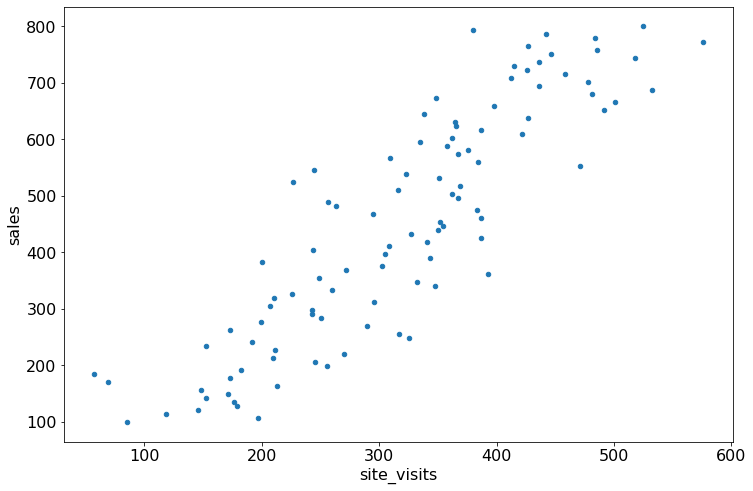

In [96]:
data.plot.scatter('site_visits','sales')

Next, let's create the model, fitting the data, and printing out the fit results:

In [97]:
# Create an instance of 
model = ols(formula='sales ~ site_visits + 1', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.9
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           5.53e-33
Time:                        17:26:55   Log-Likelihood:                -600.41
No. Observations:                 100   AIC:                             1205.
Df Residuals:                      98   BIC:                             1210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -58.1695     29.797     -1.952      

**Is the fit significant (_hint: check the p-value for the F-statistic_)?**

**Are the estimated values for the slope and intercept significant?**

Now let's plot the `results.fittedvalues` on top of the scatter plot for a qualitative estimate of the goodness of fit

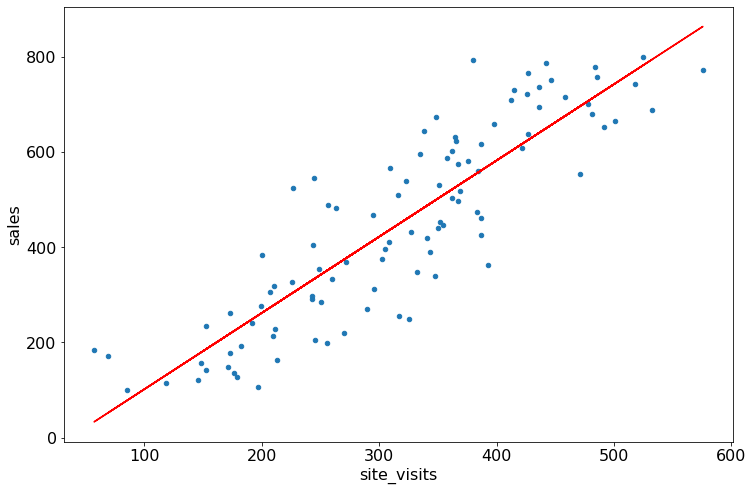

In [100]:
data.plot.scatter('site_visits','sales')

plt.plot(data['site_visits'], results.fittedvalues, color='red')

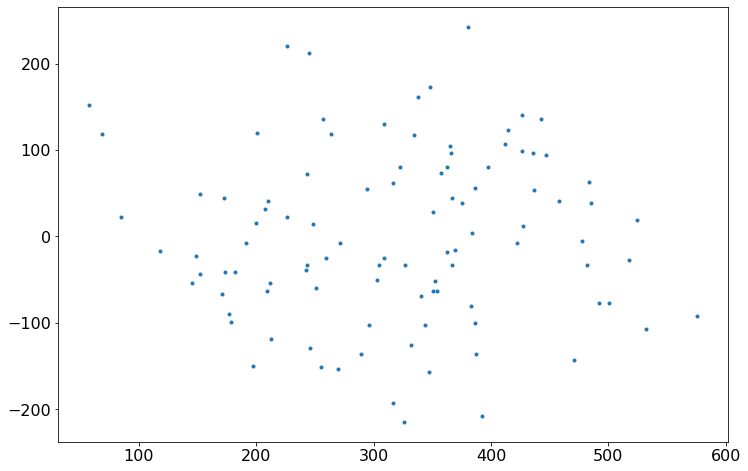

In [102]:
residuals = results.resid

plt.plot(data['site_visits'], residuals, linestyle='', marker='.')

# Repeat Regression Analysis Above for `total_customers`

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           4.86e-27
Time:                        17:33:59   Log-Likelihood:                -614.32
No. Observations:                 100   AIC:                             1233.
Df Residuals:                      98   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         229.7248     18.611     

/opt/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


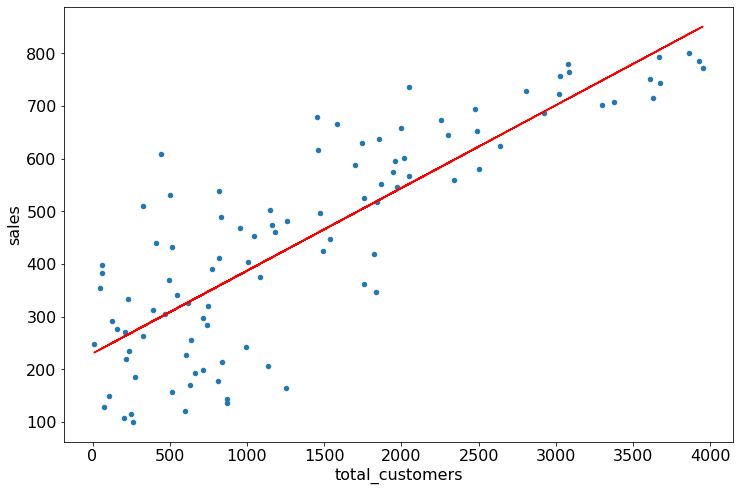

In [104]:
data.plot.scatter('total_customers','sales')

# Create an instance of 
model = ols(formula='sales ~ total_customers + 1', data=data)
results = model.fit()

print(results.summary())

plt.plot(data['total_customers'], results.fittedvalues, color='red')

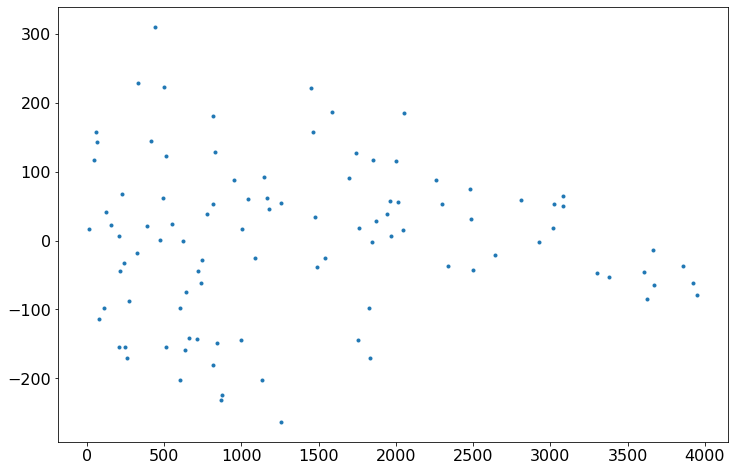

In [106]:
residuals = results.resid

plt.plot(data['total_customers'], residuals, linestyle='', marker='.')

# Repeat Regression Analysis Above for `production_cost`

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           3.60e-27
Time:                        17:35:13   Log-Likelihood:                -614.02
No. Observations:                 100   AIC:                             1232.
Df Residuals:                      98   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7326.7198    457.897     

/opt/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/miniconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


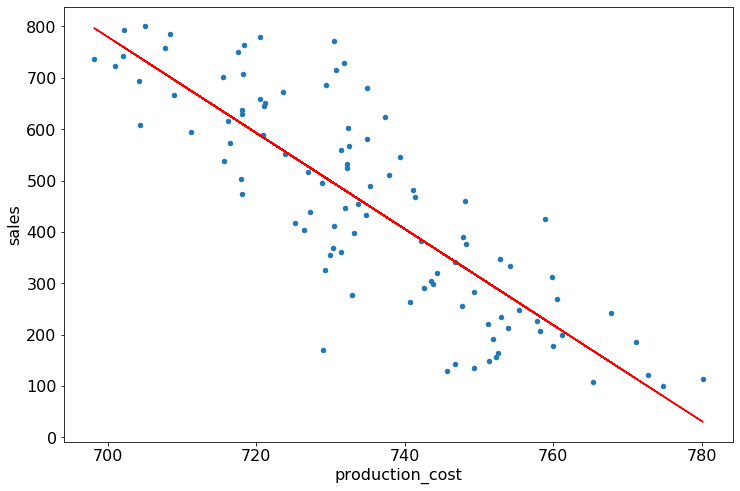

In [107]:
data.plot.scatter('production_cost','sales')

# Create an instance of 
model = ols(formula='sales ~ production_cost + 1', data=data)
results = model.fit()

print(results.summary())

plt.plot(data['production_cost'], results.fittedvalues, color='red')

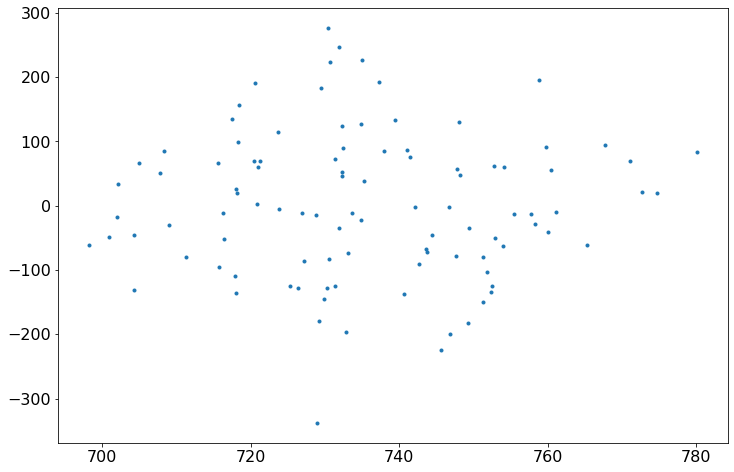

In [108]:
residuals = results.resid

plt.plot(data['production_cost'], residuals, linestyle='', marker='.')